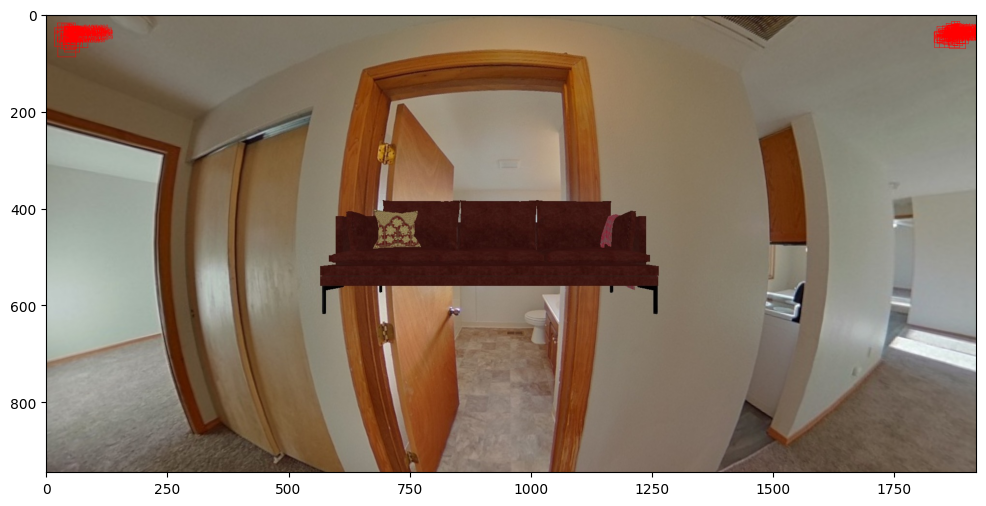

In [3]:
import torch
import matplotlib.pyplot as plt
import FurnitureDetector
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

# Define your model architecture
model = FurnitureDetector.get_model(train=False)

# Set model to evaluation mode
model.eval()

# Perform inference
with torch.no_grad():
    url = "../dataset/data_train/0a8e9670-b1df-4a1e-9642-fa27556749f5.jpg"
    image, image_tensor = FurnitureDetector.get_image(url)
    predictions = model(image_tensor)

    pred = predictions[0]

    image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
    image = image[:3, ...]
    pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
    pred_boxes = pred["boxes"].long()
    output_image = draw_bounding_boxes(image, pred_boxes, pred_labels, colors="red")

    plt.figure(figsize=(12, 12))
    plt.imshow(output_image.permute(1, 2, 0))

